data dictionary: https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf
data: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

### Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



## Import data

In [5]:
taxiDF = pd.read_parquet('yellow_tripdata_2020-01.parquet')
taxiDF.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,None
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,None
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,None


## Data Exploration

In [7]:
#determining relevent features using data dictionary
taxiDF.columns

#9 relevent features:
taxiDF= taxiDF[['tpep_pickup_datetime', 'tpep_dropoff_datetime','passenger_count', 'trip_distance', 'RatecodeID',
                'PULocationID', 'DOLocationID', 'payment_type','total_amount']]

In [8]:
taxiDF.head(3)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,238,239,1,11.27
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,239,238,1,12.30
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,238,238,1,10.80


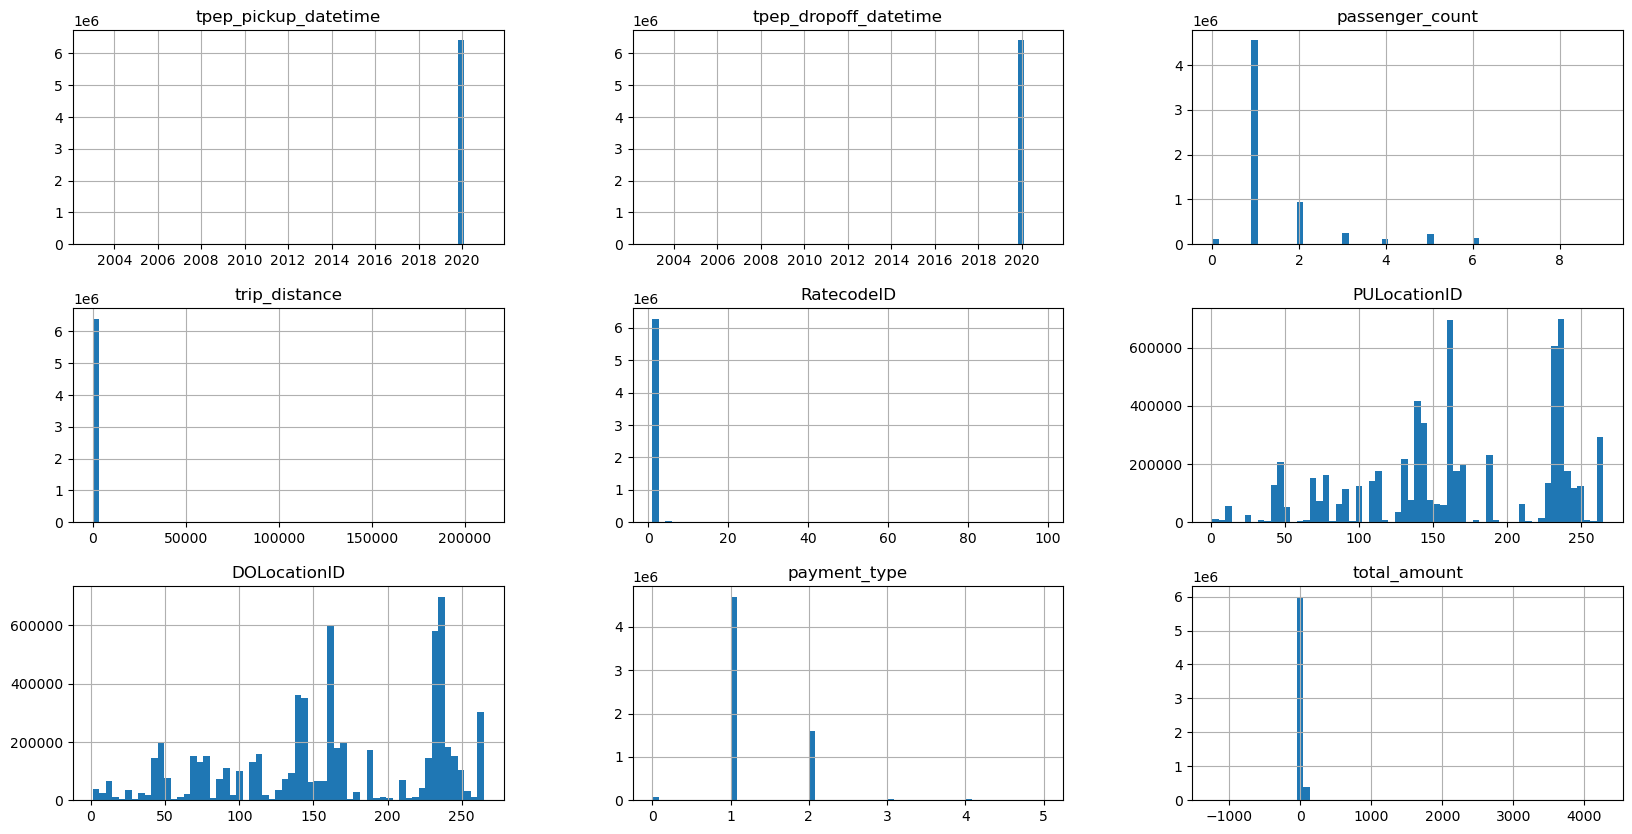

In [9]:
taxiDF.hist(figsize= (20,10), bins=60)
plt.show()

#Look into RateCodeID and Total Amount-- there looks like outliers

In [10]:
taxiDF['RatecodeID'].value_counts()
#Value range is accurate per data dictionary

RatecodeID
1.0     6126536
2.0      157733
5.0       36296
3.0       13476
4.0        5130
99.0        350
6.0          46
Name: count, dtype: int64

In [11]:
taxiDF.reset_index()

,index,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,238,239,1,11.27
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,239,238,1,12.30
2,2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,238,238,1,10.80
3,3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,238,151,1,8.16
4,4,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,193,193,2,4.80
...,...,...,...,...,...,...,...,...,...,...
6405003,6405003,2020-01-31 23:08:00,2020-01-31 23:34:00,NaN,12.07,NaN,191,35,0,55.73
6405004,6405004,2020-01-31 23:00:00,2020-01-31 23:44:00,NaN,23.48,NaN,186,117,0,63.68
6405005,6405005,2020-01-31 23:13:00,2020-01-31 23:38:00,NaN,12.09,NaN,164,131,0,47.69
6405006,6405006,2020-01-31 23:02:54,2020-01-31 23:27:10,NaN,11.65,NaN,10,16,0,31.79


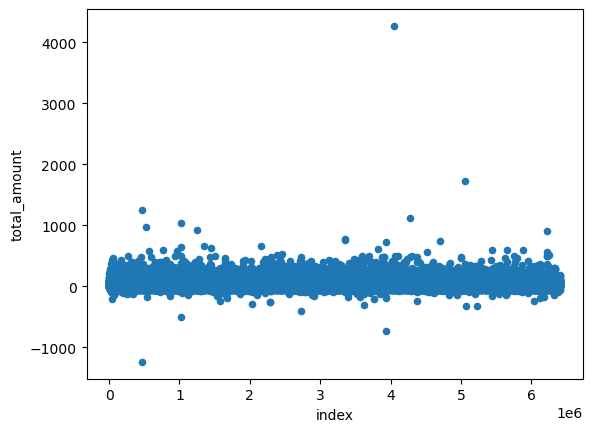

In [12]:
taxiDF.reset_index().plot(kind='scatter', y='total_amount', x='index')
plt.show()

#we have high outliers and negative numbers which doesnt make sense

There are 2 things to address that don't make sense- high outliers and negative numbers.

In [14]:
taxiDF[taxiDF['total_amount']<0].head() #19,500 negative values out of 6 million

#The negative values  come from disputes or no charge payment types so I am going to delete the negative values from dataset


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
160,2020-01-01 00:54:28,2020-01-01 00:58:41,1.0,0.60,1.0,170,137,3,-8.3
372,2020-01-01 00:57:13,2020-01-01 00:58:05,1.0,0.11,1.0,260,260,3,-3.8
667,2020-01-01 00:36:31,2020-01-01 00:37:23,3.0,0.18,1.0,141,141,3,-6.8
677,2020-01-01 00:23:15,2020-01-01 00:23:54,2.0,0.09,1.0,114,114,3,-6.3
1007,2020-01-01 00:13:39,2020-01-01 00:24:26,2.0,1.26,1.0,249,68,4,-12.3


In [15]:
taxiDF[taxiDF['total_amount']==0].head()
taxiDF[taxiDF['total_amount']==0]['trip_distance'].value_counts()
#will also be deleted amounts of $0 because majority of them had a distance of 0

trip_distance
0.00     1044
0.01       37
0.02       19
0.10       16
0.03       14
         ... 
18.67       1
4.93        1
2.57        1
14.81       1
1.31        1
Name: count, Length: 356, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

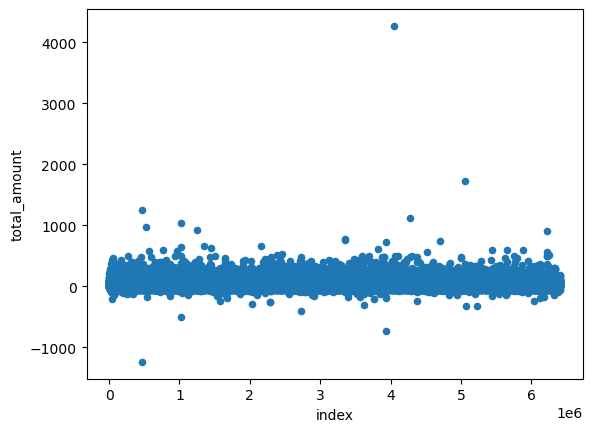

In [16]:
taxiDF.reset_index().plot(kind='scatter', x='index', y='total_amount')

In [17]:
taxiDF[taxiDF['total_amount']>250].shape

(584, 9)

In [18]:
taxiDF.total_amount.mean()
#Going to remove datapoints over $250

18.663148797003842

## Data Cleaning
1. Remove negative values from Total Amount
2. Remove 0's from Total Amount
3. Remove Total Amount above $250

In [20]:
datafiltered = taxiDF[    (taxiDF['total_amount']<250) & (taxiDF['total_amount']>0)     ]
datafiltered[datafiltered['total_amount']==0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount


In [21]:
datafiltered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65377
trip_distance                0
RatecodeID               65377
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

In [22]:
datafiltered[datafiltered['passenger_count'].isna()].head(3)
#These are part of a FlexFare which is similar to Uber payment up front. THis is only 1% of data so will also remove these data points

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
6339567,2020-01-01 00:21:08,2020-01-01 00:50:54,NaN,7.49,NaN,17,82,0,36.14
6339568,2020-01-01 00:02:00,2020-01-01 00:25:00,NaN,9.69,NaN,137,212,0,40.70
6339569,2020-01-01 00:27:54,2020-01-01 00:41:15,NaN,3.03,NaN,236,42,0,26.41


In [23]:
datafilteredno0= datafiltered[datafiltered['payment_type']!=0]

## Data Preparation

In [25]:
dataprepared = datafilteredno0.copy()

In [26]:
dataprepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [27]:
#change categorical features to strings
dataprepared['RatecodeID'] = dataprepared['RatecodeID'].astype(str)
dataprepared['PULocationID']= dataprepared['PULocationID'].astype(str)
dataprepared['DOLocationID']= dataprepared['DOLocationID'].astype(str)
dataprepared['payment_type']= dataprepared['payment_type'].astype(str)
dataprepared['passenger_count']= dataprepared['passenger_count'].astype(int)

In [28]:
#separate datetime into categories
dataprepared['Date']= dataprepared['tpep_pickup_datetime'].dt.date
dataprepared['Year']= dataprepared['tpep_pickup_datetime'].dt.year
dataprepared['Month']= dataprepared['tpep_pickup_datetime'].dt.month
dataprepared['Day']= dataprepared['tpep_pickup_datetime'].dt.day
dataprepared['Hour']= dataprepared['tpep_pickup_datetime'].dt.hour

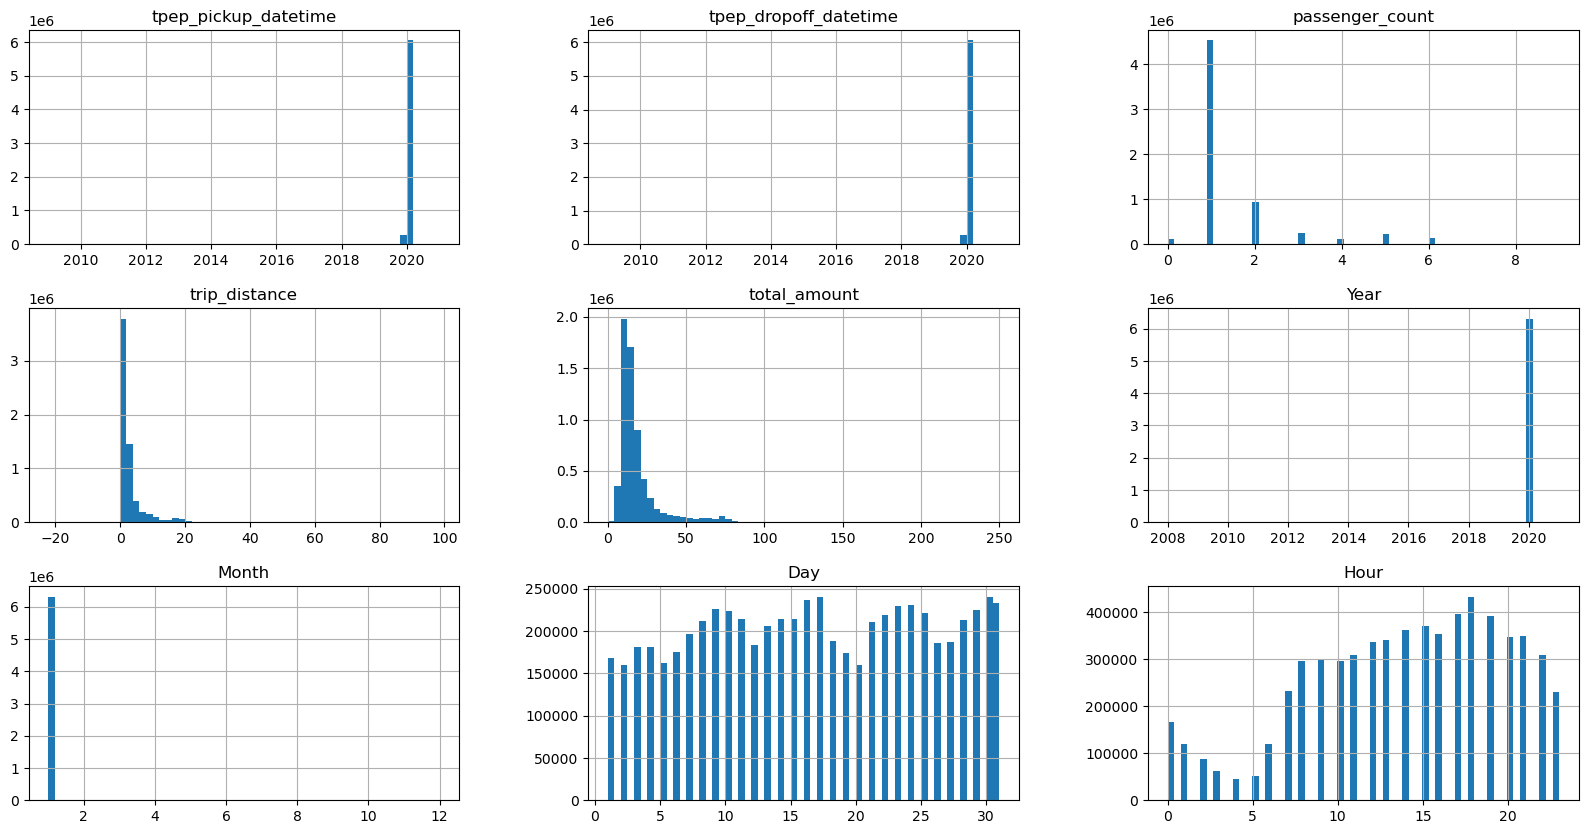

In [29]:
dataprepared.hist(figsize=(20,10), bins=60)
plt.show()

In [30]:
#Remove data that isn't in right year/month
dataprepared= dataprepared[dataprepared['Year']==2020]
dataprepared= dataprepared[dataprepared['Month']==1]

In [31]:
#only include relevant features and separate by categorical and numerical

catcolumns= ['PULocationID', 'Month', 'Day', 'Hour', 'Date' ]
numcolumns= ['total_amount','trip_distance']
allcol = catcolumns+ numcolumns

df= dataprepared[allcol]

In [32]:
#better to aggregate data by date and location 
#model predicts income for taxi driver in given hour instead of specific instances
datagroupedBYREGION = df.groupby(['PULocationID', 'Date', 'Month', 'Day', 'Hour']).mean().reset_index()
datagroupedBYREGION['countOfTransactions'] = df.groupby(['PULocationID', 'Date', 'Month', 'Day', 'Hour']).count().reset_index()['total_amount']

<Axes: >

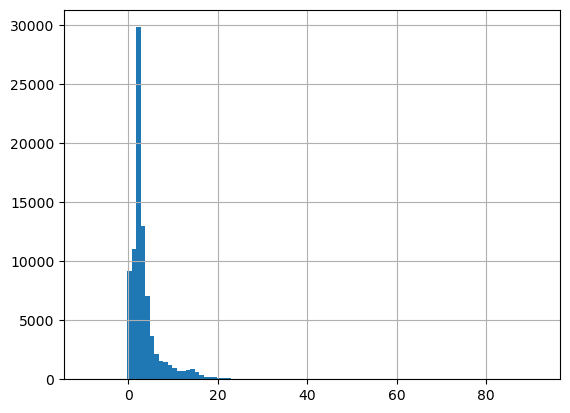

In [33]:
datagroupedBYREGION['trip_distance'].hist(bins=100)

<Axes: >

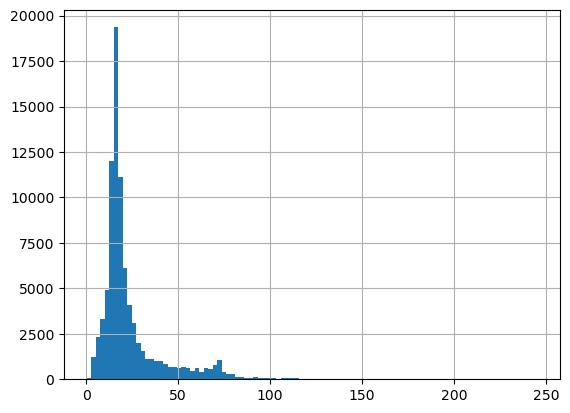

In [34]:
datagroupedBYREGION['total_amount'].hist(bins=100)

## Benchmark Model

In [36]:
dataModel = datagroupedBYREGION.copy()

In [69]:
features = dataModel.drop(['total_amount','Date'], axis=1)
catfeatures = dataModel.drop(['total_amount','trip_distance', 'Date'], axis=1)
label = dataModel['total_amount']
features.columns

Index(['PULocationID', 'Month', 'Day', 'Hour', 'trip_distance',
       'countOfTransactions'],
      dtype='object')

In [116]:
from sklearn.model_selection import train_test_split
X = pd.get_dummies(features)

X_trainb, X_testb, y_trainb, y_testb = train_test_split(X, label, test_size=.2, random_state=42)


In [210]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_trainb, y_trainb)

DecisionTreeRegressor(max_depth=10)

In [211]:
y_predb = tree.predict(X_testb)

In [126]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

y_predb = tree.predict(X_testb)

print('mean absolute error', mean_absolute_error(y_testb,y_predb )  )
print('mean squared error', mean_squared_error(y_testb,y_predb ))
print('root mean squared error', root_mean_squared_error(y_testb,y_predb ))
print ('r2', r2_score(y_testb,y_predb ))

NameError: name 'tree' is not defined

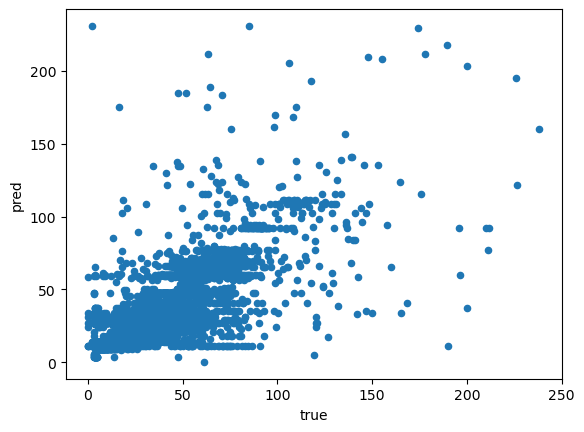

In [216]:
data = {'true':y_testb, 'pred': y_predb }
results=pd.DataFrame(data)

results.plot(kind='scatter', x='true', y='pred')
plt.show()

Is it overfit.... or is trip distance is not a good feature because its too coorelated. And taxi drivers won't know the distance up front

In [219]:
#newfeatures without distance
features = dataModel.drop(['total_amount','Date', 'trip_distance', 'countOfTransactions'], axis=1)
label = dataModel['total_amount']
X = pd.get_dummies(features)

#split data
X_trainb, X_testb, y_trainb, y_testb = train_test_split(X, label, test_size=.2, random_state=42)

#fit and predict
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_trainb, y_trainb)
y_predb = tree.predict(X_testb)

#evaluate
print('mean absolute error', mean_absolute_error(y_testb,y_predb )  )
print('mean squared error', mean_squared_error(y_testb,y_predb ))
print('root mean squared error', root_mean_squared_error(y_testb,y_predb ))
print ('r2', r2_score(y_testb,y_predb ))

mean absolute error 9.779548573499465
mean squared error 261.3999691897945
root mean squared error 16.167868418248414
r2 0.2947872184158661


Model is significantly worse when you take out distance... as expected

## Feature Engineering

In [83]:
dataNF = dataModel.copy()

In [85]:
dataNF['Date']= pd.to_datetime(dataNF['Date'])
dataNF['Weekday']= dataNF['Date'].dt.weekday
dataNF['Weekend']= dataNF['Weekday'].apply(lambda x: True if x==5 or x==6 else False)

In [87]:
from pandas.tseries.holiday import USFederalHolidayCalendar

dataNF['Date']= dataNF['Date'].astype(str)
holidays=USFederalHolidayCalendar().holidays(start='2019', end= '2021').date
dataNF['is_holiday']= dataNF['Date'].isin(holidays)

In [89]:
zones = pd.read_csv('taxi_zone_lookup.csv')
zones['LocationID'] = zones['LocationID'].astype(str)
zones.dtypes

LocationID      object
Borough         object
Zone            object
service_zone    object
dtype: object

In [91]:
dataNF = dataNF.merge(zones, left_on = 'PULocationID', right_on= 'LocationID', how = 'left')
dataNF= dataNF.drop(['LocationID', 'Zone', 'service_zone'], axis=1)

In [93]:
dataNF['Borough'].value_counts()

Borough
Manhattan        44869
Queens           18060
Brooklyn         16364
Bronx             5083
Unknown            744
EWR                376
Staten Island      285
Name: count, dtype: int64

In [95]:
dataNF.loc[dataNF['PULocationID']==265,'Borough'] = 'Outside of NYC'

## Adding Weather 
downloaded from https://www.kaggle.com/datasets/aadimator/nyc-weather-2016-to-2022?resource=download

In [98]:
weather = pd.read_csv('NYC_Weather_2016_2022.csv')

In [100]:
weather['time']=pd.to_datetime(weather['time'])
weather['Date_W']= weather['time'].dt.date
weather['Year_W']= weather['time'].dt.year
weather['Month_W']=weather['time'].dt.month
weather['Day_W']=weather['time'].dt.day
weather['Hour_W']=weather['time'].dt.hour

In [102]:
weather2020_1 = weather.loc[(weather['Year_W']==2020) & (weather['Month_W']==1)] 

In [104]:
dataWithWeather = dataNF.merge(weather2020_1, left_on = ['Month','Day','Hour'], right_on = ['Month_W','Day_W','Hour_W'], how='left')

In [106]:
dataWithWeather= dataWithWeather.drop(['Date_W', 'Month_W','Day_W','Hour_W'], axis=1)

In [108]:
dataWithWeather.isna().sum()

PULocationID               0
Date                       0
Month                      0
Day                        0
Hour                       0
total_amount               0
trip_distance              0
countOfTransactions        0
Weekday                    0
Weekend                    0
is_holiday                 0
Borough                  705
time                       0
temperature_2m (°C)        0
precipitation (mm)         0
rain (mm)                  0
cloudcover (%)             0
cloudcover_low (%)         0
cloudcover_mid (%)         0
cloudcover_high (%)        0
windspeed_10m (km/h)       0
winddirection_10m (°)      0
Year_W                     0
dtype: int64

In [110]:
dataWithWeather.loc[dataWithWeather['Borough'].isna(),'Borough'] = 'Outside of NYC'
dataWithWeather['Borough']

0                  EWR
1                  EWR
2                  EWR
3                  EWR
4                  EWR
             ...      
86481           Queens
86482           Queens
86483           Queens
86484    Staten Island
86485    Staten Island
Name: Borough, Length: 86486, dtype: object

## Model Training

In [112]:
dataformodel= dataWithWeather.copy()
dataformodel

,PULocationID,Date,Month,Day,Hour,total_amount,trip_distance,countOfTransactions,Weekday,Weekend,...,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),Year_W
0,1,2020-01-01,1,1,3,95.30,0.00,1,2,False,...,5.2,0.0,0.0,74.0,23.0,88.0,0.0,12.3,265.0,2020
1,1,2020-01-01,1,1,4,94.80,0.00,1,2,False,...,5.0,0.0,0.0,23.0,3.0,34.0,0.0,13.4,264.0,2020
2,1,2020-01-01,1,1,5,40.30,0.00,1,2,False,...,4.6,0.0,0.0,5.0,0.0,8.0,0.0,14.6,261.0,2020
3,1,2020-01-01,1,1,6,111.32,0.00,4,2,False,...,4.3,0.0,0.0,0.0,0.0,0.0,0.0,15.5,258.0,2020
4,1,2020-01-01,1,1,7,0.31,0.00,1,2,False,...,4.1,0.0,0.0,0.0,0.0,0.0,0.0,15.7,259.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86481,98,2020-01-30,1,30,12,5.80,1.02,1,3,False,...,-4.5,0.0,0.0,0.0,0.0,0.0,0.0,10.6,24.0,2020
86482,98,2020-01-31,1,31,7,40.00,0.00,1,4,False,...,-0.5,0.0,0.0,66.0,73.0,0.0,1.0,4.8,42.0,2020
86483,98,2020-01-31,1,31,10,39.12,0.00,1,4,False,...,-0.9,0.0,0.0,74.0,49.0,23.0,53.0,4.8,48.0,2020
86484,99,2020-01-01,1,1,18,96.80,35.75,1,2,False,...,3.9,0.0,0.0,100.0,100.0,72.0,0.0,21.7,281.0,2020


In [118]:
input_features = ['PULocationID', 'Month', 'Day', 'Hour', 'Weekday', 'Weekend',
       'is_holiday', 'Borough', 'temperature_2m (°C)', 'precipitation (mm)','cloudcover_mid (%)','windspeed_10m (km/h)'  ]
target= 'total_amount'

X=dataformodel[input_features]
y=dataformodel[target]
X= pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42) 

In [120]:
from sklearn.tree import DecisionTreeRegressor
 #need Max Depth or else it will overfit
decision_treeweather= DecisionTreeRegressor(max_depth=10)
decision_treeweather.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10)

In [232]:
y_pred = decision_treeweather.predict(X_test)

print('mean absolute error', mean_absolute_error(y_test,y_pred )  )
print('mean squared error', mean_squared_error(y_test,y_pred ))
print('root mean squared error', root_mean_squared_error(y_test,y_pred ))
print ('r2', r2_score(y_test,y_pred ))

mean absolute error 8.715050047229207
mean squared error 238.27230743963472
root mean squared error 15.43607163236925
r2 0.3571817272022272


This is great. Our RMSE went down by ~ $1 and r2 increased by 6% so there are signs of improvement

#### Trying Random Forest

In [122]:
from sklearn.ensemble import RandomForestRegressor

RFmodel= RandomForestRegressor()
RFmodel.fit(X_train, y_train)


RandomForestRegressor()

In [243]:
y_pred = RFmodel.predict(X_test)

print('mean absolute error', mean_absolute_error(y_test,y_pred )  )
print('mean squared error', mean_squared_error(y_test,y_pred ))
print('root mean squared error', root_mean_squared_error(y_test,y_pred ))
print ('r2', r2_score(y_test,y_pred ))

mean absolute error 7.238496832770414
mean squared error 192.55920646233943
root mean squared error 13.876570414275259
r2 0.480507920372618


#### Trying Gradient Boosting

In [245]:
from sklearn.ensemble import GradientBoostingRegressor

GBmodel= GradientBoostingRegressor()
GBmodel.fit(X_train, y_train)

GradientBoostingRegressor()

In [251]:
y_pred = GBmodel.predict(X_test)


print('mean absolute error', mean_absolute_error(y_test,y_pred )  )
print('mean squared error', mean_squared_error(y_test,y_pred ))
print('root mean squared error', root_mean_squared_error(y_test,y_pred ))
print ('r2', r2_score(y_test,y_pred ))

mean absolute error 8.384005829148501
mean squared error 198.59808645876308
root mean squared error 14.092483331860395
r2 0.46421604637917235


<Axes: >

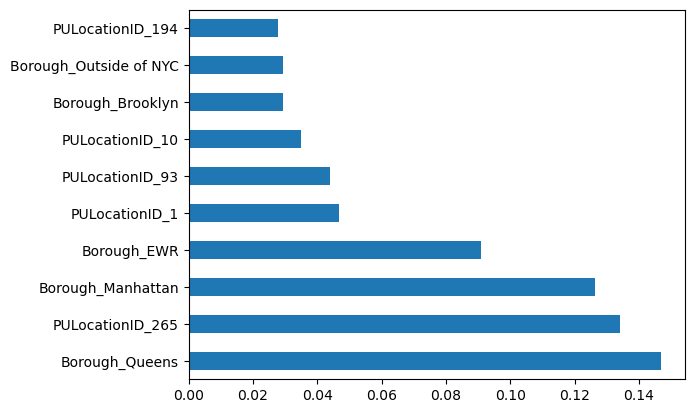

In [257]:
pd.Series(GBmodel.feature_importances_, index= X_train.columns).nlargest(10).plot(kind='barh')

Shows the Queen Borough is the most important feature in predicting for the Gradient Booster model

## Overall Results of 4 Models

In [280]:
dictionary = { 'Model':['Benchmark', 'Decision Tree','Random Forest','Gradient Boosting' ],
              'MAE': [9.77, 8.72, 7.24, 8.38 ],
             'RMSE': [16.16,15.44,13.88, 14.09  ],
             'R2': [0.29, 0.36, 0.48, 0.46]}

pd.DataFrame(dictionary)

,Model,MAE,RMSE,R2
0,Benchmark,9.77,16.16,0.29
1,Decision Tree,8.72,15.44,0.36
2,Random Forest,7.24,13.88,0.48
3,Gradient Boosting,8.38,14.09,0.46


Random Forest performed the best so I will proceed with finetuning that model

## Fine Tuning

In [286]:
#look at documentation for parameters

random_grid = {'n_estimators':[int(x) for x in np.linspace(start= 200, stop=2000, num=10)],   #number of trees in RF
               'max_features':['auto','sqrt'],                                                # num of features to consider at every split
               'max_depth':[10,20,50,100,150,200,300, 500],                                   # max number of levels
               'min_samples_split':[2, 5, 10, 20, 40],                                       # min num of samples to split a node
               'min_samples_leaf':[1, 2, 4, 10, 20],                                         # min num of samples at each leaf node
               'bootstrap':[True, False]                                                      # method to select samples for training trees
              }

In [290]:
from sklearn.model_selection import RandomizedSearchCV

rf= RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 10, cv=3, verbose= 2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

performances = pd.DataFrame.from_dict(rf_random.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=300, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 2.3min
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=40, n_estimators=200; total time= 1.7min
[CV] END bootstrap=True, max_depth=500, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time= 5.4min


/Users/samicirceo/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/samicirceo/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/samicirceo/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/samicirceo/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constrain

[CV] END bootstrap=False, max_depth=300, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 2.3min
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=40, n_estimators=200; total time= 1.7min
[CV] END bootstrap=True, max_depth=300, max_features=auto, min_samples_leaf=2, min_samples_split=40, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=300, max_features=auto, min_samples_leaf=2, min_samples_split=40, n_estimators=600; total time=   0.2s
[CV] END bootstrap=True, max_depth=300, max_features=auto, min_samples_leaf=2, min_samples_split=40, n_estimators=600; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=1000; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=1000; total time=   0.2s
[CV] END bootstrap=False, m

In [296]:
performances.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
6,299.306433,5.587454,23.891029,5.207658,600,10,1,sqrt,500,True,"{'n_estimators': 600, 'min_samples_split': 10,...",0.524249,0.538666,0.538270,0.533729,0.006705,1
3,101.140878,1.174102,3.705357,0.466444,200,40,4,sqrt,50,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.516798,0.532432,0.535086,0.528105,0.008069,2
0,130.281333,0.335540,7.951010,0.039908,200,10,1,sqrt,300,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.511240,0.527730,0.526623,0.521864,0.007526,3
9,662.667739,55.839973,57.913066,13.337869,1200,5,1,sqrt,150,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.492292,0.512960,0.509572,0.504942,0.009051,4
2,39.184041,3.904646,1.453181,0.103325,200,5,4,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.458183,0.472936,0.478656,0.469925,0.008625,5


In [ ]:
#going to pick model 3 because it will be the fastest

In [308]:
from sklearn.model_selection import GridSearchCV

rf= RandomForestRegressor(max_features='sqrt',min_samples_split=40,  min_samples_leaf=4, bootstrap=False)

param_grid2 = {'n_estimators':[150,200],
               'max_depth':[40,50] }

grid= GridSearchCV(rf, param_grid2, cv=3, scoring= 'neg_mean_squared_error', return_train_score=True)
grid.fit(X_train, y_train)

performances = pd.DataFrame.from_dict(grid.cv_results_)

In [310]:
grid.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,21.894925,0.604847,0.898358,0.118272,40,150,"{'max_depth': 40, 'n_estimators': 150}",-178.373748,-177.692414,-177.995079,-178.020414,0.278729,4,-157.054632,-156.277280,-156.291914,-156.541275,0.363047
1,28.735985,0.425649,1.100883,0.017753,40,200,"{'max_depth': 40, 'n_estimators': 200}",-178.034069,-177.424882,-177.086535,-177.515162,0.392061,3,-156.569371,-156.020990,-155.347776,-155.979379,0.499581
2,23.559457,0.504441,0.967481,0.015353,50,150,"{'max_depth': 50, 'n_estimators': 150}",-175.811716,-175.137853,-175.375102,-175.441557,0.279088,2,-151.878216,-150.438483,-150.816360,-151.044353,0.609477
3,31.093103,0.432161,1.510086,0.169543,50,200,"{'max_depth': 50, 'n_estimators': 200}",-175.723832,-174.935817,-175.440896,-175.366848,0.325939,1,-150.997282,-150.228184,-150.686518,-150.637328,0.315904


In [318]:
abs(grid.best_score_)

175.3668484252652

In [123]:
bestmodel = RandomForestRegressor(n_estimators= 150,
               max_features= 'sqrt',
               max_depth= 40 ,
               min_samples_split= 40,
               min_samples_leaf=4,
               bootstrap= False)

bestmodel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      min_samples_leaf=4, min_samples_split=40,
                      n_estimators=150)

In [128]:
y_pred = bestmodel.predict(X_test)


print('mean absolute error', mean_absolute_error(y_test,y_pred )  )
print('mean squared error', mean_squared_error(y_test,y_pred ))
print('root mean squared error', root_mean_squared_error(y_test,y_pred ))
print ('r2', r2_score(y_test,y_pred ))

mean absolute error 7.460982311631751
mean squared error 177.3268002346691
root mean squared error 13.316410936685196
r2 0.5216023688506719


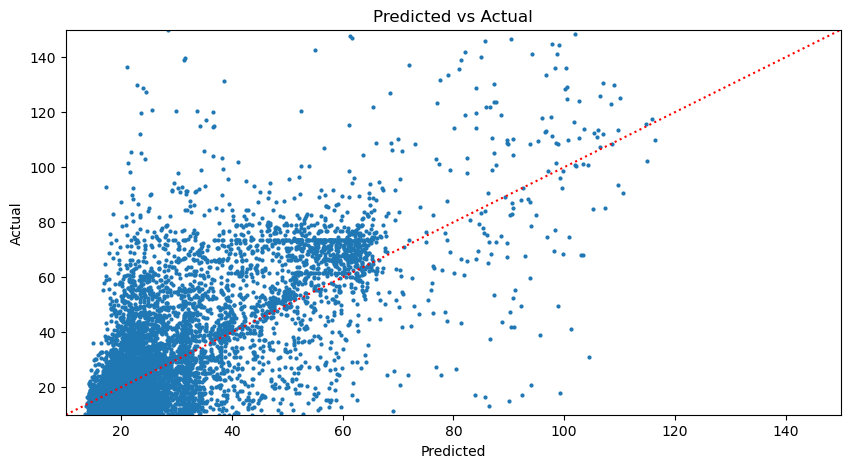

In [158]:
import matplotlib.pyplot as plt

plt.figure(figsize= (10,5))
plt.scatter(x=y_pred, y=y_test, s= 4)
plt.xlim(10,150)
plt.ylim(10,150)
plt.axline((0, 0), slope=1, color='red', linestyle=':')
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show('Actual')

Our metrics are improved but still not really great. Only 52% of data is explained by model and our predictions are on average off by $13 per hour

One way to Reducing Category of Data

# Classification Style

17.46318841220699

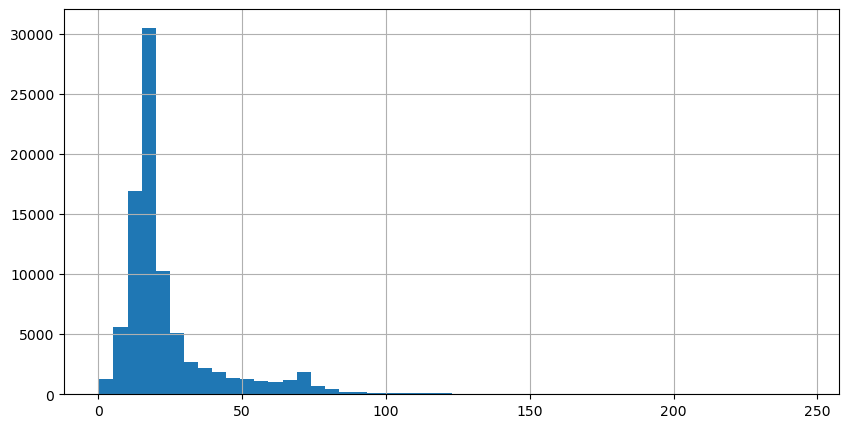

In [386]:
classdata = dataformodel.copy()

classdata['total_amount'].hist(bins=50, figsize= (10,5))
classdata['total_amount'].median()

In [396]:
classdata = dataformodel.copy()
classdata['earning_class'] = classdata['total_amount'].apply(lambda x: 'low' if x<=17.5 else 'high')
classdata['earning_classBINARY'] = classdata['earning_class'].apply(lambda x: 0 if x== 'low' else 1)

classdata['earning_class'].value_counts()

earning_class
low     43484
high    43002
Name: count, dtype: int64

In [402]:
input_features = ['PULocationID', 'Month', 'Day', 'Hour', 'Weekday', 'Weekend',
       'is_holiday', 'Borough', 'temperature_2m (°C)', 'precipitation (mm)','cloudcover_mid (%)','windspeed_10m (km/h)'  ]
target= 'earning_classBINARY'

In [404]:
X = classdata[input_features]
y= classdata[target]
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42) 

In [406]:
from sklearn.ensemble import RandomForestClassifier

classmodel = RandomForestClassifier()
classmodel.fit(X_train, y_train)
y_pred = classmodel.predict(X_test)

In [410]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

confusion_matrix(y_test,y_pred )

array([[6617, 2059],
       [2240, 6382]])

In [416]:
print ('accuracy', round(accuracy_score(y_test,y_pred),2))
print ('precision', round(precision_score(y_test,y_pred),2))
print ('recall', round(recall_score(y_test,y_pred),2))

accuracy 0.75
precision 0.76
recall 0.74


Based on these metrics, our classifier is performing well. 